In [1]:
import sys
import os
import time
import pickle
import json
import numpy as np
import daq_control
import pilatus
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

import run_run as rr

In [2]:
import trigger_qr_run 
arduino = trigger_qr_run.run_control()

In [3]:
def plot_data(data):
    #Find interesting limits
    zoom = 36
    xlim = (np.argmax(data['exposure'])-zoom/2, np.argmax(data['exposure'])+zoom*2)
    fig= plt.figure(figsize=(10,10))
    axes = []
    axes.append(plt.subplot2grid((6, 2), (0, 0), colspan=2, rowspan=2))
    axes.append(plt.subplot2grid((6, 2), (2, 0), colspan=2))
    axes.append(plt.subplot2grid((6, 2), (3, 0), colspan=2))
    axes.append(plt.subplot2grid((6, 2), (4, 0), colspan=2))
    axes.append(plt.subplot2grid((6, 2), (5, 0)))
    axes.append(plt.subplot2grid((6, 2), (5, 1)))
    plt.subplots_adjust(left=.15, bottom=.06, right=.95, top=.97, 
                        wspace=.17, hspace=.30)
    curr = axes[1]
    curr.set_ylabel('Length')
    curr.set_title('L (V)')
    curr.plot(np.multiply(2,data['exposure'])-5, 'r')
    curr.plot(data['length'])
    curr.set_xlim(xlim)
    curr.set_ylim((min(data['length']), max(data['length'])))
    curr = axes[2]
    curr.set_ylabel('F (V)')
    curr.set_title('Force')
    curr.plot(np.multiply(2,data['exposure'])-5, 'r')
    curr.plot(data['force'])
    curr.set_xlim(xlim)
    curr.set_ylim((min(data['force']), max(data['force'])))
    curr = axes[3]
    curr.set_ylabel('Stim (V)')
    curr.set_title('Stimulation')
    curr.plot(np.multiply(2,data['exposure'])-5, 'r')
    curr.plot(data['stimulation'])
    curr.set_xlim(xlim)
    curr.set_ylim((min(data['stimulation']), max(data['stimulation'])))
    curr = axes[4]
    curr.set_ylabel('Beam (BPM diode)')
    curr.set_title('Beam')
    curr.plot(np.multiply(2,data['exposure'])-5, 'r')
    curr.plot(data['beam'])
    curr.set_ylim((min(data['beam']), max(data['beam'])))
    curr = axes[5]
    curr.set_ylabel('Exposure trigger (V)')
    curr.set_title('Pilatus')
    curr.plot(data['exposure'])
    curr = axes[0]
    try:
        img = plt.imread('Z:\\2016DanielQR\\'+data['image_path'].split('/')[-1])
        curr.imshow(img[:,:,0], interpolation='none', cmap='viridis')
        curr.set_yticks([])
        curr.set_xticks([])
    except:
        pass
    plt.tight_layout()
    plt.show()


def grab_and_plot(input_dict, arduino):
    data = rr.grab(input_dict, arduino)
    plot_data(data)
    return data, input_dict

In [5]:
trial_number = 0

def increase_trial_and_run(input_dict, arduino):
    input_dict["trial_number"] = trial_number
    data = rr.grab(input_dict, arduino)
    plot_data(data)
    return trial_number + 1

Trig wait with T1461709464_Delay1000_Offset19.656_Fiber010
done


<IPython.core.display.Javascript object>


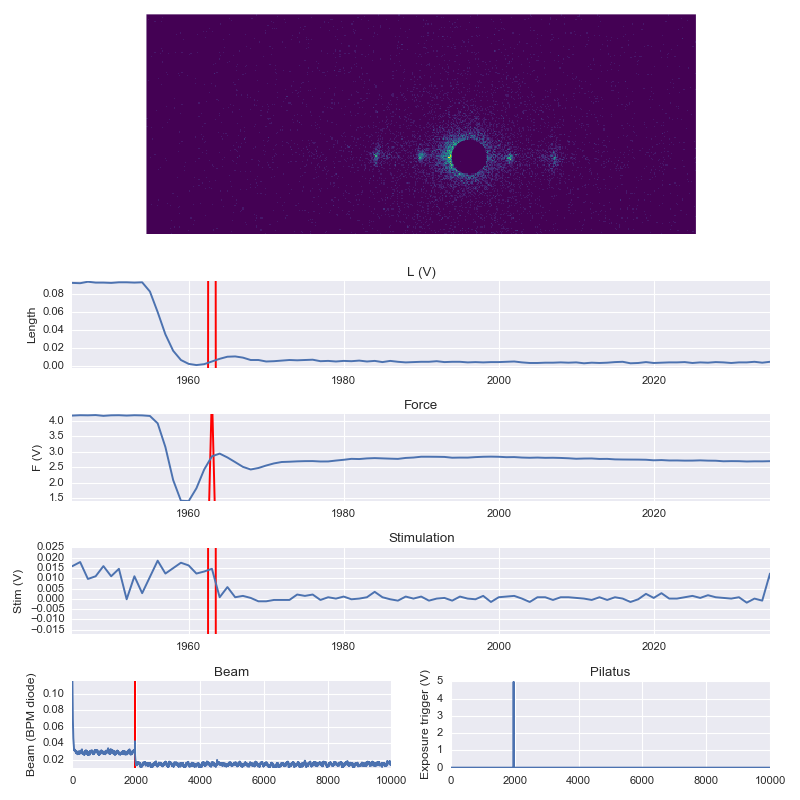

In [72]:
run_deets = {
    "fiber_number":10,
    "moth":4,
    "mount_length":6.5,
    "initial_stim_force": 3.94,
    "initial_pre_stim_force": 3.60,
    "initial_rise_time": 1,
    "time": time.time(),
    "exposure_delay":1100,
    "fiber_offset":19.656,
    "exposure_length": 100,
    "species": 'moth',
    "notes": ""
}

trial_number = increase_trial_and_run(run_deets, arduino)

## Run to release arduino serial port connection

In [ ]:
del(arduino)
del(trigger_qr_run)

In [73]:
(time.time()-1461709464)/60

0.7744500001271566

In [15]:
reload(rr)
reload(pilatus)

<module 'pilatus' from 'pilatus.py'>

In [ ]:
data = pickle.load(open('./trials/T1461537073.pkl'))

In [ ]:
plot_data(data)